2025-01-27 19:09:51.455457: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 19:09:51.460922: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 19:09:51.520810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-27 19:09:51.589147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738001391.657806    6637 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738001391.67

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


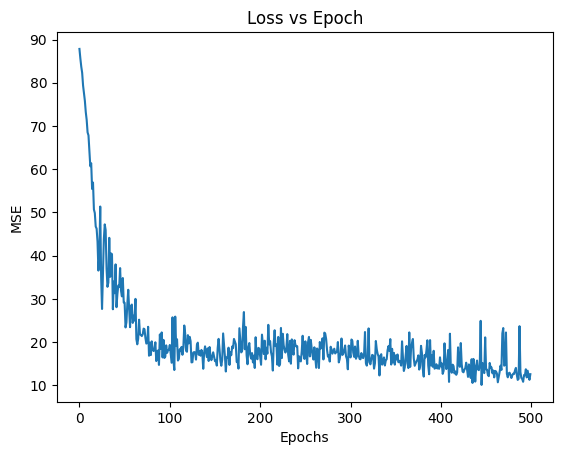

Valores originales: [12. 10.  4. 15.  7.  0.]
Valores predichos: [11.218068  10.606428   9.994789   9.38315    6.027777   1.8680836]
City 0.0: Original: 12.0, Predicted: 11.22
City 1.0: Original: 10.0, Predicted: 10.61
City 2.0: Original: 4.0, Predicted: 9.99
City 3.0: Original: 15.0, Predicted: 9.38
City 4.0: Original: 7.0, Predicted: 6.03
City 5.0: Original: 0.0, Predicted: 1.87


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Dataset
cities = np.array([[0], [1], [2], [3], [4], [5]], dtype=float)
heuristics = np.array([12, 10, 4, 15, 7, 0], dtype=float)

# Normalization
cities_normalized = cities / np.max(cities)

# Neural Network mejorada
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.1),  # Regularización con Dropout
    Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1)  # Salida
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
early_stopping = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
history = model.fit(cities_normalized, heuristics, epochs=500, verbose=0)

# Predicciones
predictions = model.predict(cities_normalized)

# Visualization
plt.plot(history.history['loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# Resultados
print("Valores originales:", heuristics)
print("Valores predichos:", predictions.flatten())
for i, city in enumerate(cities.flatten()):
    print(f"City {city}: Original: {heuristics[i]}, Predicted: {predictions[i, 0]:.2f}")


In [2]:
import heapq

# Graph
graph = {
    'CityA': [('CityB', 5), ('CityD', 3)],
    'CityB': [('CityC', 7), ('CityE', 6)],
    'CityC': [('CityF', 4)],
    'CityD': [('CityE', 8)],
    'CityE': [('CityF', 2)],
    'CityF': []
}

"""
    A* Algorithm
    :param start: Initial node.
    :param goal: Goal node.
    :param heuristic_fn: Heuristic function that estimates the cost from a node to the goal.
    :return: Tuple with the path and the total cost.
"""
def a_star_search(start, goal, heuristic_fn,predictions):
    
    # The priority queue stores elements as (f, g, current_node, path)
    queue = [(0 + heuristic_fn(start,predictions), 0, start, [])]
    visited = set()

    while queue:
        f, g, node, path = heapq.heappop(queue)

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, g

        for neighbor, cost in graph[node]:
            if neighbor not in visited:
                heapq.heappush(queue, (g + cost + heuristic_fn(neighbor,predictions), g + cost, neighbor, path))

    return None, float('inf')  # No path found

# Heuristic function
def heuristic(city,predictions):
    heuristic_values = {
        'CityA': predictions[0,0],
        'CityB': predictions[1,0],
        'CityC': predictions[2,0],
        'CityD': predictions[3,0],
        'CityE': predictions[4,0],
        'CityF': predictions[5,0]
    }
    return heuristic_values.get(city, float('inf'))

# Execution
if __name__ == "__main__":
    start = 'CityA'
    goal = 'CityF'
    path, cost = a_star_search(start, goal, heuristic,predictions)
    if path:
        print("Path:", path, "Cost:", cost)
    else:
        print("No path found")


Path: ['CityA', 'CityB', 'CityE', 'CityF'] Cost: 13
